In [1]:
import numpy as np 
import pandas as pd 

In [2]:
lbm_df = pd.read_csv("datasets/LBMData.csv")


In [3]:
lbm = lbm_df[["Age (years)", "Height (cm)", "Weight (kg)", "BMI (kg/m2)", "(times/week)", "Protein intake (g/kg/day)", "Energy intake (kcal/kg/day)", "Relative LBM change per week"]]
lbm

,Age (years),Height (cm),Weight (kg),BMI (kg/m2),(times/week),Protein intake (g/kg/day),Energy intake (kcal/kg/day),Relative LBM change per week
0,65.0,173.3,78.0,26.0,3,2.40,37.00,0.001923
1,23.2,178.3,76.4,24.1,4,3.30,63.30,0.004745
2,18.9,177.0,74.9,23.4,4,NaN,NaN,-0.004506
3,20.8,177.5,78.9,25.1,3,1.25,33.30,0.002028
4,46.7,163.2,87.7,33.0,2,NaN,NaN,-0.000268
...,...,...,...,...,...,...,...,...
107,67.6,155.8,62.3,25.7,3,0.87,26.70,0.000936
108,64.4,161.5,80.1,30.8,3,1.47,21.76,0.000300
109,20.8,170.2,73.1,25.2,3,1.54,32.76,0.001710
110,24.2,186.6,79.9,22.9,4,1.70,43.20,0.003520


In [4]:
lbm = lbm.astype(float)
lbm = lbm.dropna()
lbm

,Age (years),Height (cm),Weight (kg),BMI (kg/m2),(times/week),Protein intake (g/kg/day),Energy intake (kcal/kg/day),Relative LBM change per week
0,65.0,173.3,78.0,26.0,3.0,2.40,37.00,0.001923
1,23.2,178.3,76.4,24.1,4.0,3.30,63.30,0.004745
3,20.8,177.5,78.9,25.1,3.0,1.25,33.30,0.002028
5,64.8,174.0,86.7,28.6,3.0,1.26,28.80,0.000903
6,64.8,174.0,86.7,28.6,3.0,1.40,26.60,0.000682
...,...,...,...,...,...,...,...,...
106,62.5,169.3,92.5,32.3,3.0,1.64,21.40,0.000216
107,67.6,155.8,62.3,25.7,3.0,0.87,26.70,0.000936
108,64.4,161.5,80.1,30.8,3.0,1.47,21.76,0.000300
109,20.8,170.2,73.1,25.2,3.0,1.54,32.76,0.001710


In [5]:
X = lbm.drop(columns=['Relative LBM change per week'])
y = lbm['Relative LBM change per week']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    train_size=0.80,
    test_size=0.20,
    random_state=2)

In [7]:
import torch
from torch import nn
from torch import optim

In [8]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [9]:
torch.manual_seed(12)
model = nn.Sequential(
    nn.Linear(7, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [10]:
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
print(X_train_tensor.shape)  # Should be [batch_size, 7]


torch.Size([74, 7])


In [11]:
num_epochs = 1000
for epoch in range(num_epochs):
    predictions = model(X_train_tensor)
    MSE = loss(predictions, y_train_tensor)
    MSE.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], MSE Loss: {MSE.item()}')

Epoch [100/1000], MSE Loss: 1.0684419870376587
Epoch [200/1000], MSE Loss: 0.2526875436306
Epoch [300/1000], MSE Loss: 0.10850661247968674
Epoch [400/1000], MSE Loss: 0.06841984391212463
Epoch [500/1000], MSE Loss: 0.05089764669537544
Epoch [600/1000], MSE Loss: 0.03980068117380142
Epoch [700/1000], MSE Loss: 0.032023925334215164
Epoch [800/1000], MSE Loss: 0.02643088810145855
Epoch [900/1000], MSE Loss: 0.02224057726562023
Epoch [1000/1000], MSE Loss: 0.01904403418302536


In [13]:
model.eval()    
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_MSE = loss(predictions, y_test_tensor)
# show output
print('Test MSE is ' + str(test_MSE.item()))
print('Test Root MSE is ' + str(test_MSE.item()**(1/2)))

Test MSE is 0.01978401094675064
Test Root MSE is 0.1406556466934429


In [14]:
torch.save(model, "testModel.pth")

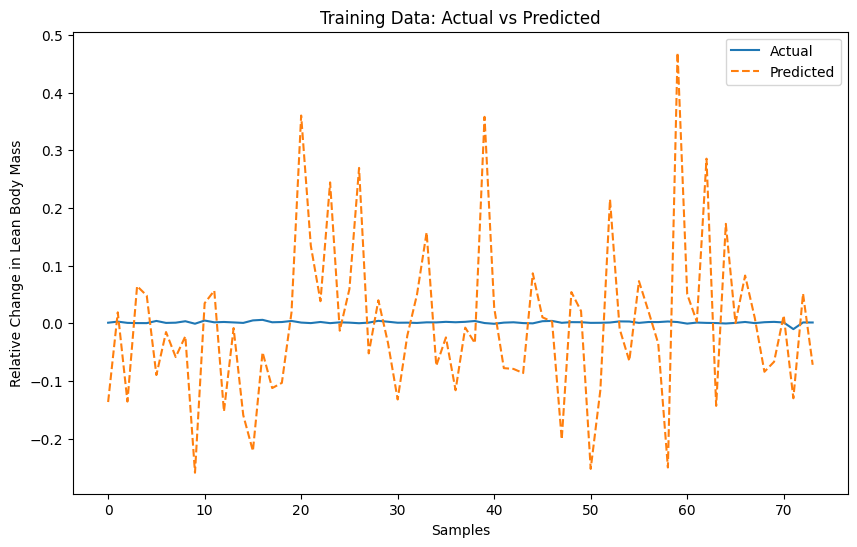

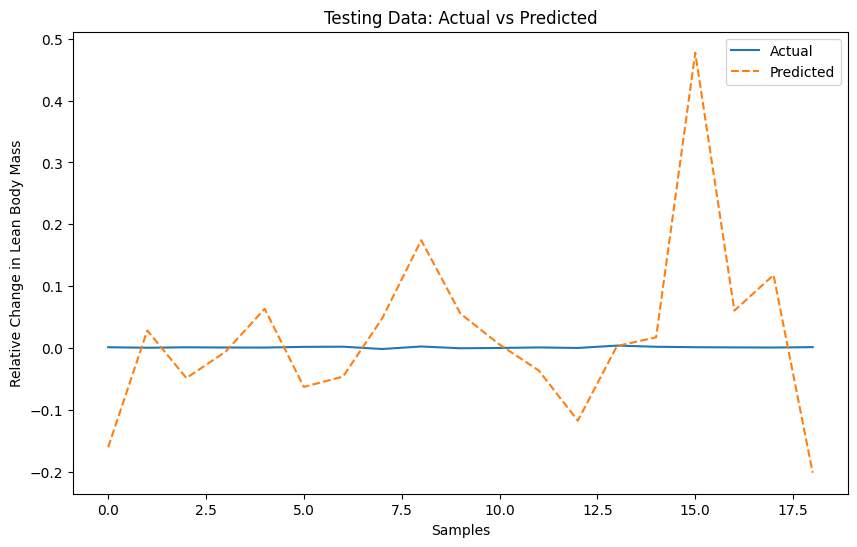

In [16]:
import matplotlib.pyplot as plt
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    train_predictions = model(X_train_tensor).squeeze()  # Ensure predictions are 1D
    test_predictions = model(X_test_tensor).squeeze()    # Ensure predictions are 1D

# Convert tensors to NumPy arrays (for plotting)
train_predictions = train_predictions.numpy()
y_train = y_train_tensor.numpy()
test_predictions = test_predictions.numpy()
y_test = y_test_tensor.numpy()

# Plot Training Results
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual')
plt.plot(train_predictions, label='Predicted', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Relative Change in Lean Body Mass')
plt.title('Training Data: Actual vs Predicted')
plt.legend()
plt.show()

# Plot Testing Results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Relative Change in Lean Body Mass')
plt.title('Testing Data: Actual vs Predicted')
plt.legend()
plt.show()